## Example Notebook for the Trapped Bosons
This Notebook is based on the following [paper](https://science.sciencemag.org/content/345/6194/306.abstract) of Cindy Regal.

In [2]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame

%config InlineBackend.figure_format='retina'

We will start with a single atom in a well.
$$\newcommand{\braket}[3]{\left\langle{#1}\middle|{#2}|{#3}\right\rangle}$$
The tunnel coupling is given by $J = -\braket{R}{H_{sp}}{L}\hbar$ where $|L\rangle$ and $|R\rangle$ are the lowest energy states in the left or right well and $H_{sp}$ the Hamiltonian for a single particel.
The Tunneling-Hamiltonian for a single boson in a well is given by: 
$\\$
$H_t=$
$\left(\begin{array}{rr} 
0 & J \\ 
J & 0  \\ 
\end{array}\right)$

In [3]:
def Ham_sq(J):
    '''
    The Hamiltonian matrix of the tunneling for a single boson
    '''
    return np.array([[0, J], [J, 0]])

In [4]:
print(Ham_sq(1))

[[0 1]
 [1 0]]


We now want to create a quantum circuit, that simulates the tunelling of a boson from one well to another. We first need to initialize the quantum circuit by raising the number operator ofthe left well by one (Boson 1 is in state $\ket{L}$). We now have a boson in the left well. After that we use a beamsplitter to represent the tunneling. By tuning $\theta$ we can now simulate the time operator and get a curve for the probabilities of the boson (see Plot. 1)

In [5]:
dev_boson = qml.device('strawberryfields.fock', wires=2, cutoff_dim=10)

@qml.qnode(dev_boson)
def single_boson(x, theta):
    qml.Displacement(x, 0, wires=0)
    qml.Beamsplitter(theta, 0, wires=[0, 1])
    return [qml.expval(qml.NumberOperator(0)),qml.expval(qml.NumberOperator(1))]

In [6]:
single_boson(1, np.pi/4)
print(single_boson.draw())

 0: ──D(1.0, 0)──╭BS(0.785, 0)──┤ ⟨n⟩ 
 1: ─────────────╰BS(0.785, 0)──┤ ⟨n⟩ 



<img width="200" height="300" src="Gates/Single_Boson_Left.svg">
We initiate a single Boson in the left Well and then perform a beamsplitter gate on the system. We can then measure the occupation number $|n\rangle_L$ and $|n\rangle_R$.

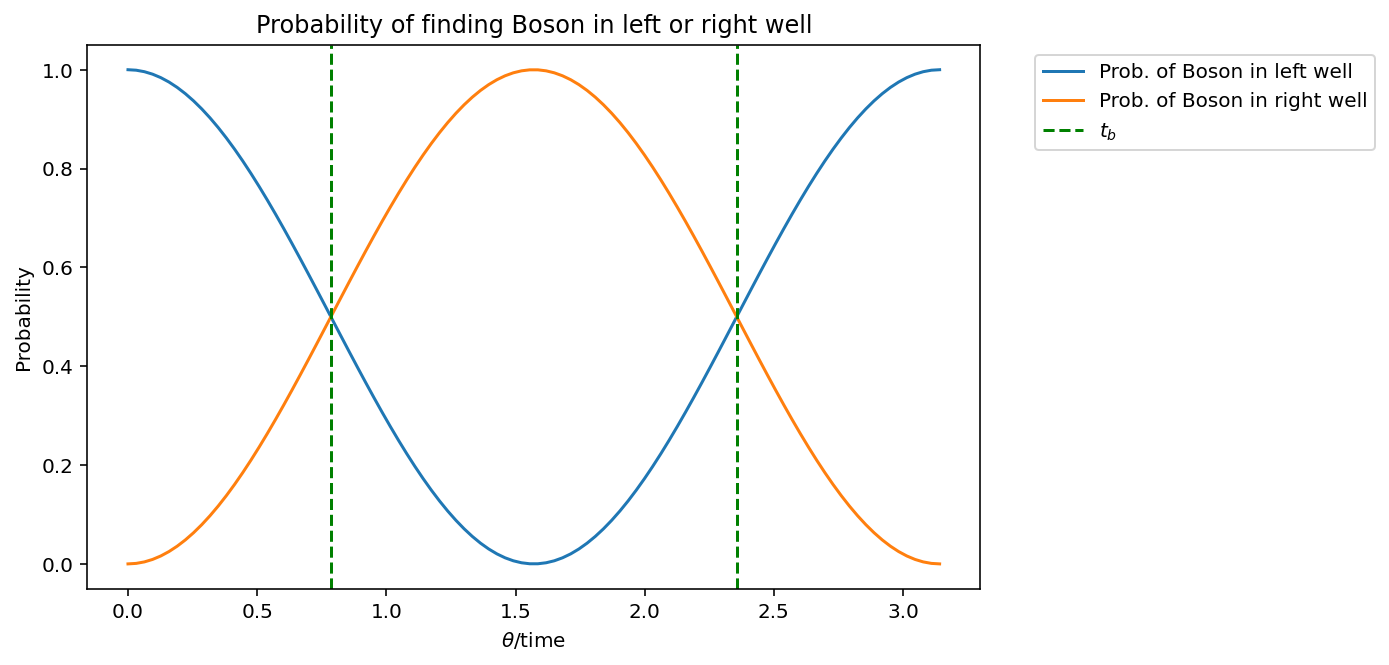

In [7]:
phis = np.linspace(0, np.pi, 100)

res = np.array([single_boson(1, phi) for phi in phis])

plt.figure(figsize=(8, 5))
plt.plot(phis, res[:, 0], label="Prob. of Boson in left well")
plt.plot(phis, res[:, 1], label="Prob. of Boson in right well")
plt.axvline(x=np.pi/4, linestyle="--", color="green", label="$t_b$")
plt.axvline(x=3*np.pi/4, linestyle="--", color="green")
plt.title("Probability of finding Boson in left or right well")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("$\\theta$/time")
_ = plt.ylabel("Probability")

In [8]:
dev_boson = qml.device('strawberryfields.fock', wires=2, cutoff_dim=10)

@qml.qnode(dev_boson)
def single_boson_fock(theta):
    qml.FockState(1, wires=0)
    qml.Beamsplitter(theta, 0, wires=[0, 1])
    return [qml.expval(qml.NumberOperator(0)),qml.expval(qml.NumberOperator(1))]


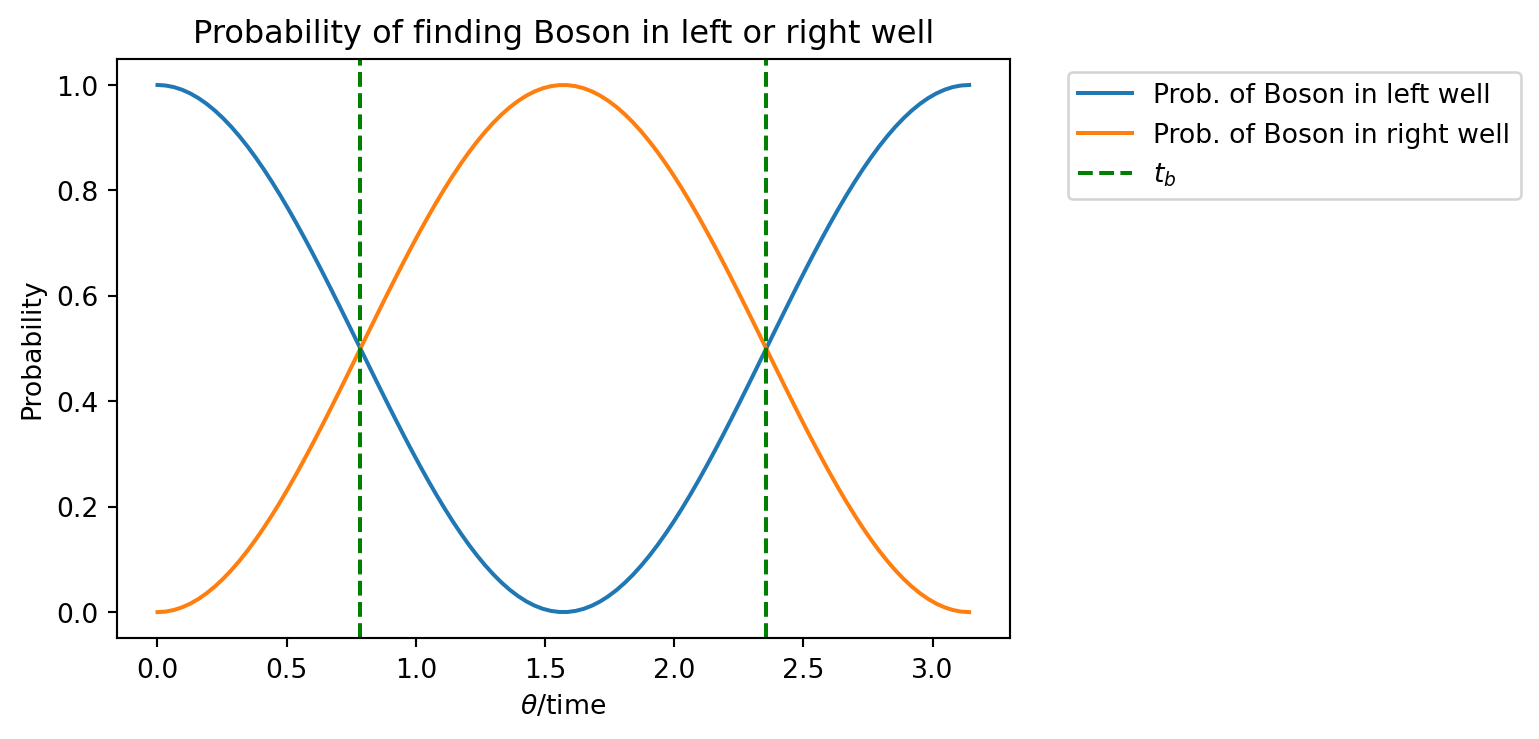

In [31]:
phis = np.linspace(0, np.pi, 100)

res = np.array([single_boson_fock(phi) for phi in phis])

plt.figure(dpi=96)
plt.plot(phis, res[:, 0], label="Prob. of Boson in left well")
plt.plot(phis, res[:, 1], label="Prob. of Boson in right well")
plt.axvline(x=np.pi/4, linestyle="--", color="green", label="$t_b$")
plt.axvline(x=3*np.pi/4, linestyle="--", color="green")
plt.title("Probability of finding Boson in left or right well")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("$\\theta$/time")
_ = plt.ylabel("Probability")

In [25]:
@qml.qnode(dev_boson)
def two_bosons(x_1, x_2, theta):
    qml.Displacement(x_1, 0, wires=0)
    qml.Displacement(x_2, 0, wires=1)
    qml.Beamsplitter(theta, 0, wires=[0, 1])
    return [qml.expval(qml.NumberOperator(0)),qml.expval(qml.NumberOperator(1))]

result = two_bosons(1, 1, 0)
print(result)

[0.99999876 0.99999876]


In [45]:
@qml.qnode(dev_boson)
def two_bosons_fock(theta):
    #qml.FockState(1, wires=0)
    qml.FockState(1, wires=1)
    qml.Beamsplitter(theta, 0, wires=[0, 1])
    return [qml.expval(qml.NumberOperator(0)),qml.expval(qml.NumberOperator(1))]

In [47]:
print(two_bosons_fock(0))

[0. 1.]


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


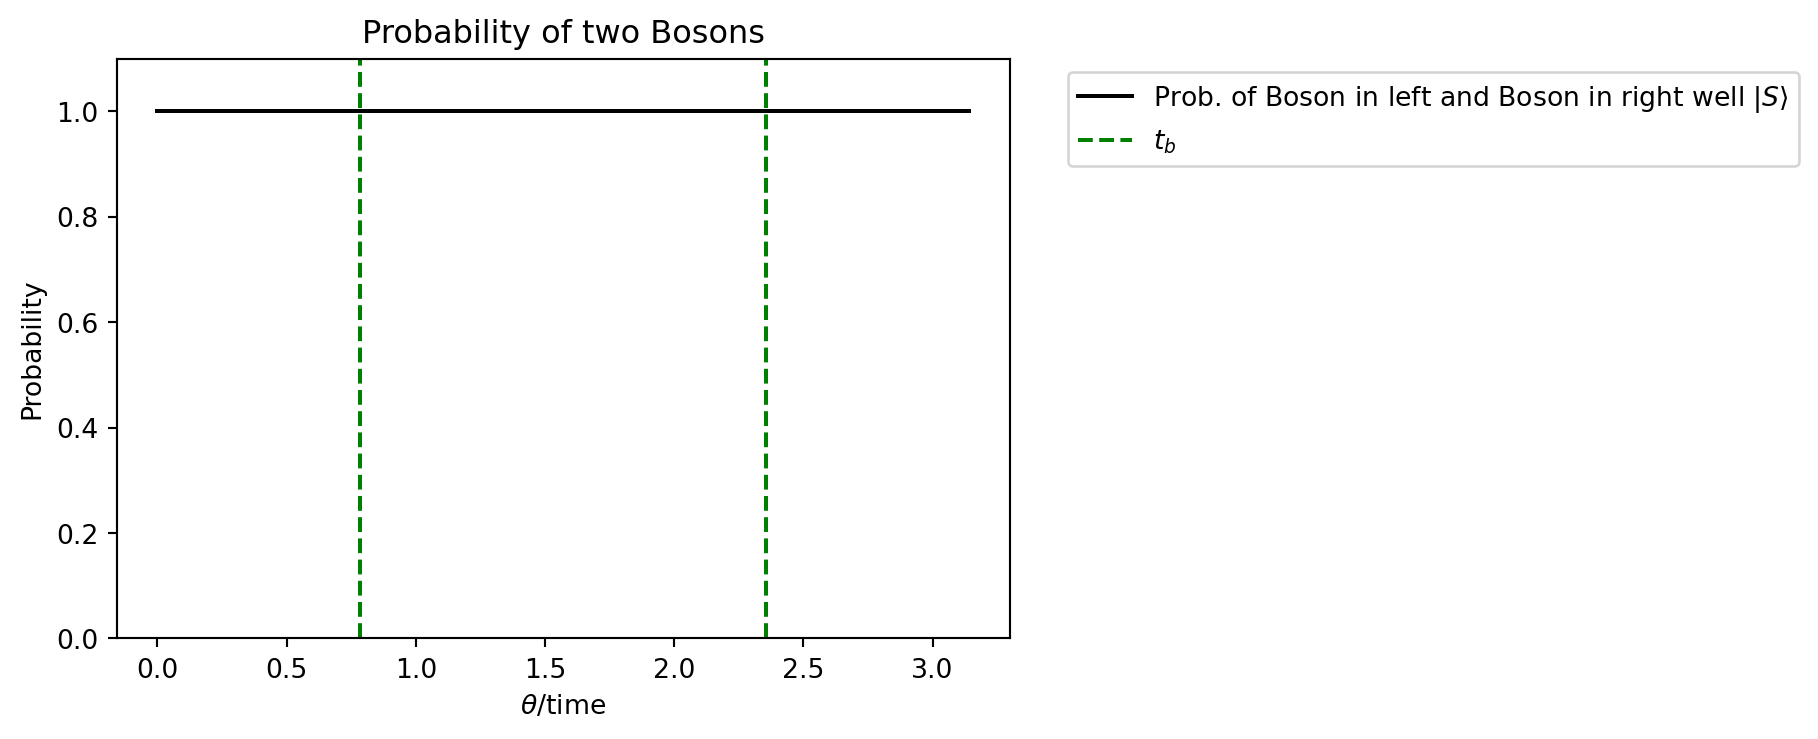

In [44]:
phis = np.linspace(0, np.pi, 100)

res = np.array([two_bosons_fock(phi) for phi in phis])
res = np.array(res)
#print(res)
plt.figure(dpi=96)
n_1 = res[:, 0]
print(n_1)
plt.plot(phis, res[:, 1]*res[:, 0], label=r"Prob. of Boson in left and Boson in right well $|S\rangle$", color="black")
plt.ylim(0, 1.1)
plt.axvline(x=np.pi/4, linestyle="--", color="green", label="$t_b$")
plt.axvline(x=3*np.pi/4, linestyle="--", color="green")
plt.title(r"Probability of two Bosons")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel(r"$\theta$/time")
_ = plt.ylabel("Probability")

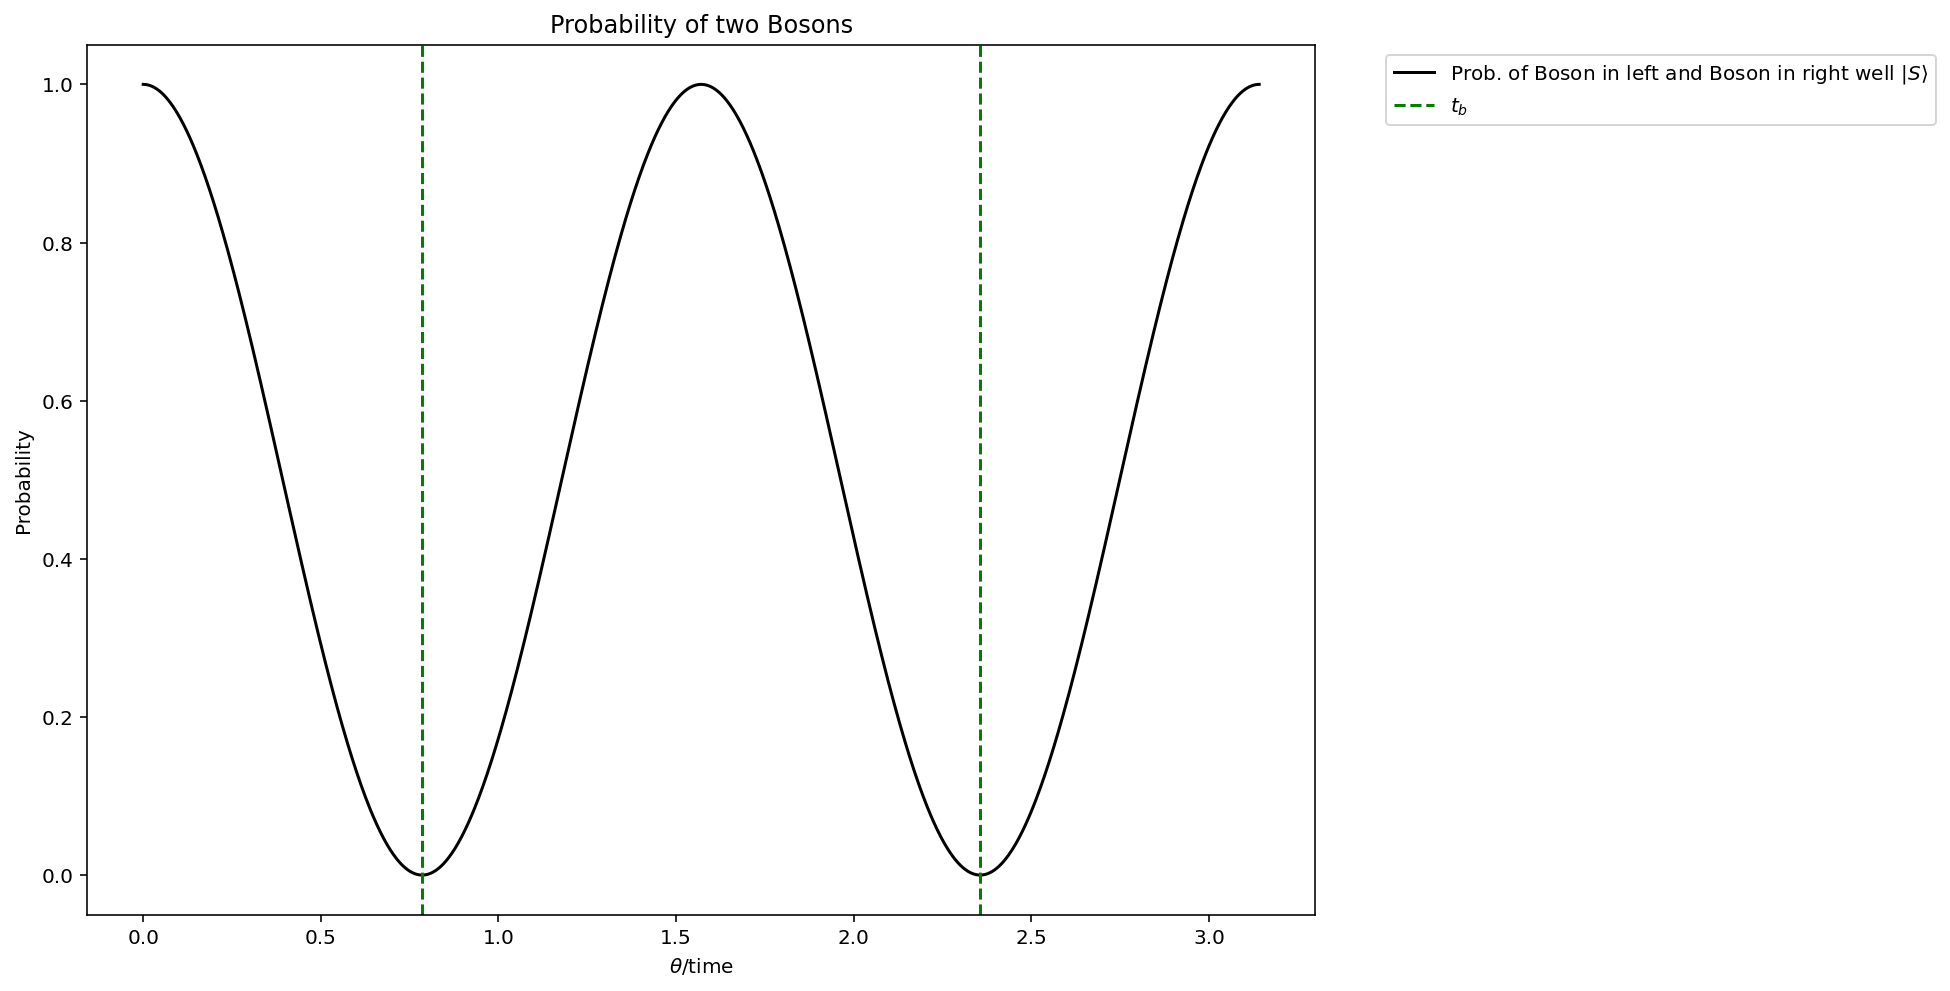

In [30]:
phis = np.linspace(0, np.pi, 1000)

res = np.array([two_bosons(1, 1, phi) for phi in phis])

plt.figure(figsize=(11, 8))
plt.plot(phis, res[:, 1]*res[:, 0], label=r"Prob. of Boson in left and Boson in right well $|S\rangle$", color="black")
plt.axvline(x=np.pi/4, linestyle="--", color="green", label="$t_b$")
plt.axvline(x=3*np.pi/4, linestyle="--", color="green")
plt.title(r"Probability of two Bosons")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel(r"$\theta$/time")
_ = plt.ylabel("Probability")

In [16]:
dev = qml.device("default.qubit", wires=2, shots=10)

@qml.qnode(dev_boson)
def two_bosons_ent(x_1, x_2, theta, phi):
    qml.Displacement(x_1, 0, wires=0)
    qml.Displacement(x_2, 0, wires=1)
    qml.ControlledPhase(phi, wires=[0, 1])
    qml.Beamsplitter(theta, 0, wires=[0, 1])
    return [qml.expval(qml.NumberOperator(0)),qml.expval(qml.NumberOperator(1))]

result = two_bosons_ent(1, 0, np.pi/2, 10)
print(result)

[0.11269378 0.09127432]


[0.98060262 1.04437007]


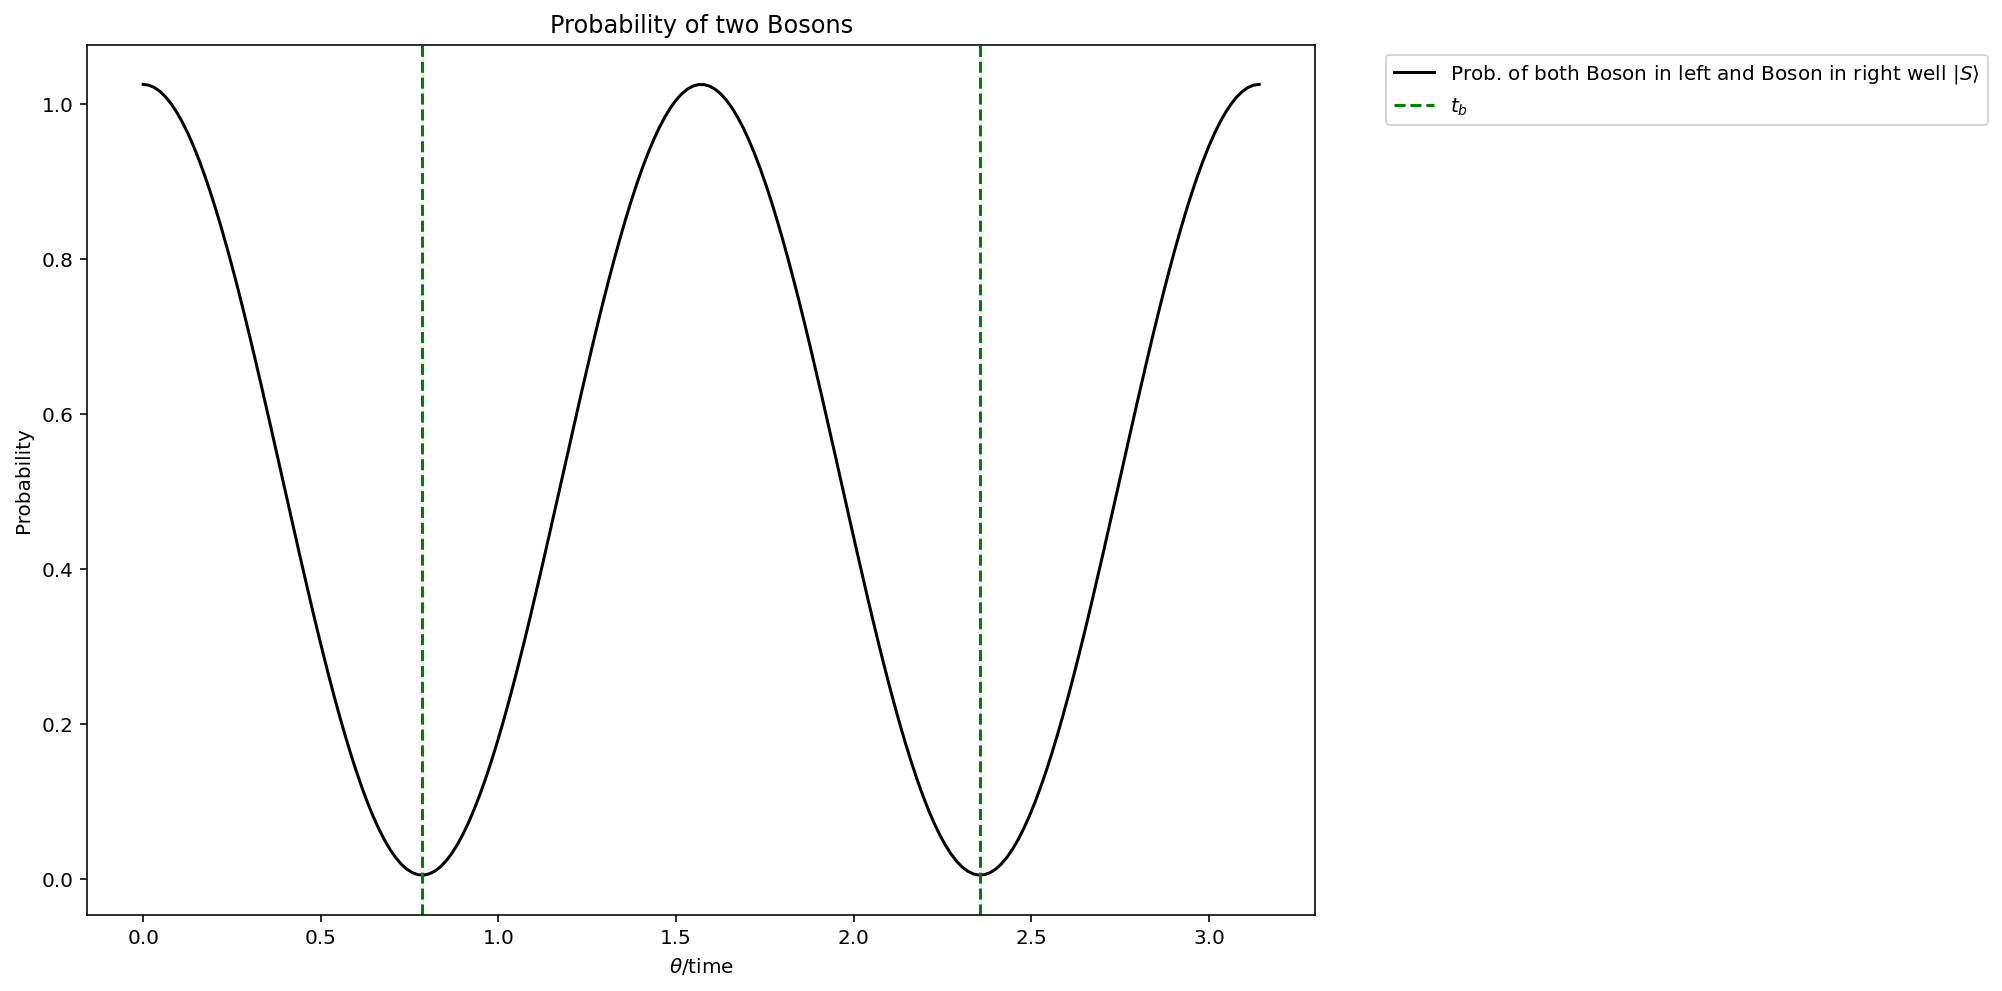

In [17]:
phis = np.linspace(0, np.pi, 200)

res = np.array([two_bosons_ent(1,1, phi, 0.1) for phi in phis])
print(res[1])

plt.figure(figsize=(11, 8))
plt.plot(phis, res[:, 1]*res[:, 0], label=r"Prob. of both Boson in left and Boson in right well $|S\rangle$", color="black")
plt.axvline(x=np.pi/4, linestyle="--", color="green", label="$t_b$")
plt.axvline(x=3*np.pi/4, linestyle="--", color="green")
plt.title(r"Probability of two Bosons")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel(r"$\theta$/time")
_ = plt.ylabel("Probability")